In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

## 데이터 삭제 및 수정

1. 3개의 파일로 이루어진 데이터 병합 및 정렬
2. "지점명"을 "위도", "경도"로 치환
3. 학습에 필요없는 데이터 삭제 (기상청이 제공하지 않는 데이터)
4. 데이터의 "평균 습도", "평균 풍속", "평균 기온", "평균 토양 수분" 계산 

In [200]:
df_1 = pd.read_csv("data/2019-2024.csv", encoding='euc-kr')
df_2 = pd.read_csv("data/2009-2018.csv", encoding='euc-kr')
df_3 = pd.read_csv("data/1999-2008.csv", encoding='euc-kr')

In [201]:
# 데이터 합치기, 정렬
df = pd.concat([df_1, df_2, df_3], ignore_index=True)
df = df.sort_values(by=['지점명', '일시'])

df.to_csv("data/combined_data.csv", index=False, encoding='utf-8-sig')

In [39]:
# 지점명 -> 위도, 경도로 표현
location_info = {
    '강정': {'위도': 33.25992, '경도': 126.48917},
    '대곡': {'위도': 35.24435, '경도': 128.15605},
    '보성군(농)': {'위도': 34.76335, '경도': 127.21226},
    '서산(농)': {'위도': 36.77655689, '경도': 126.49390764},
    '수원(농)': {'위도': 37.25746, '경도': 126.983},
    '안동옥동': {'위도': 36.54983, '경도': 128.6834},
    '오창가곡': {'위도': 36.72455, '경도': 127.46688},
    '익산': {'위도': 35.93807, '경도': 126.99252},
    '철원장흥': {'위도': 38.2016, '경도': 127.25024},
    '춘천신북': {'위도': 37.95461, '경도': 127.77626},
    '화순능주': {'위도': 35.0233, '경도': 126.94961}
}

df['위도'] = df['지점명'].map(lambda x: location_info[x]['위도'])
df['경도'] = df['지점명'].map(lambda x: location_info[x]['경도'])

In [40]:
# 삭제할 데이터 지정 
columns_to_drop = [
    "0.5M 일 지중온도(°C)", 
    "1.0M 일 지중온도(°C)", 
    "1.5M 일 지중온도(°C)", 
    "3.0M 일 지중온도(°C)", 
    "5.0M 일 지중온도(°C)", 
    "일 평균 조도(10lux)", 
    "일 전천복사(MJ/m2)", 
    "일 반사복사(MJ/m2)", 
    "일 지하수위(cm)",
    "최저 초상온도(°C)", 
    "5CM 평균 지중온도(°C)", 
    "30CM 평균 지중온도(°C)",
    "대형증발량(mm)",
    "소형증발량(mm)",
    "0.5M 평균 기온(°C)",
    "4.0M 평균 기온(°C)",
    "50CM 일 토양수분(%)",
    "20CM 일 토양수분(%)",
    "30CM 일 토양수분(%)"
]

In [204]:
# 삭제할 데이터 삭제 
df.drop(columns_to_drop, axis=1, inplace=True)

In [205]:
# 평균 습도, 평슌 풍속, 평균 기온
df['평균 습도(%)'] = df[['0.5M 평균 습도(%)', '1.5M 평균 습도(%)', '4.0M 평균 습도(%)']].mean(axis=1)
df.drop(['0.5M 평균 습도(%)', '1.5M 평균 습도(%)', '4.0M 평균 습도(%)'], axis=1, inplace=True)

df['평균 풍속(m/s)'] = df[['1.5M 평균 풍속(m/s)', '4.0M 평균 풍속(m/s)']].mean(axis=1)
df.drop(['1.5M 평균 풍속(m/s)', '4.0M 평균 풍속(m/s)'], axis=1, inplace=True)

df.rename(columns={"1.5M 평균 기온(°C)": "평균 기온(°C)"}, inplace=True)

In [206]:
# 누락된 데이터 삭제
df = df.dropna(subset='10CM 일 토양수분(%)')
df = df.dropna(subset='평균 기온(°C)')

In [207]:
df.shape

(67535, 11)

In [208]:
df.isna().sum()

지점                    0
지점명                   0
일시                    0
10CM 일 토양수분(%)        0
평균 기온(°C)             0
평균 지면온도(°C)        1467
일 순복사(MJ/m2)      31533
위도                    0
경도                    0
평균 습도(%)             14
평균 풍속(m/s)        13919
dtype: int64

In [209]:
df.to_csv("data/전체 데이터 수정본.csv", encoding="utf-8-sig", index=False)

## 시각화
1. 최대 습도, 최저 습도의 선택을 위한 시각화

In [210]:
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/gulim.ttc"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [43]:
# '일시' 열을 datetime 형식으로 변환
df['일시'] = pd.to_datetime(df['일시'])

locations = ['강정', '대곡', '보성군(농)', '서산(농)', '수원(농)', '안동옥동', '오창가곡', '익산', '철원장흥', '춘천신북', '화순능주']

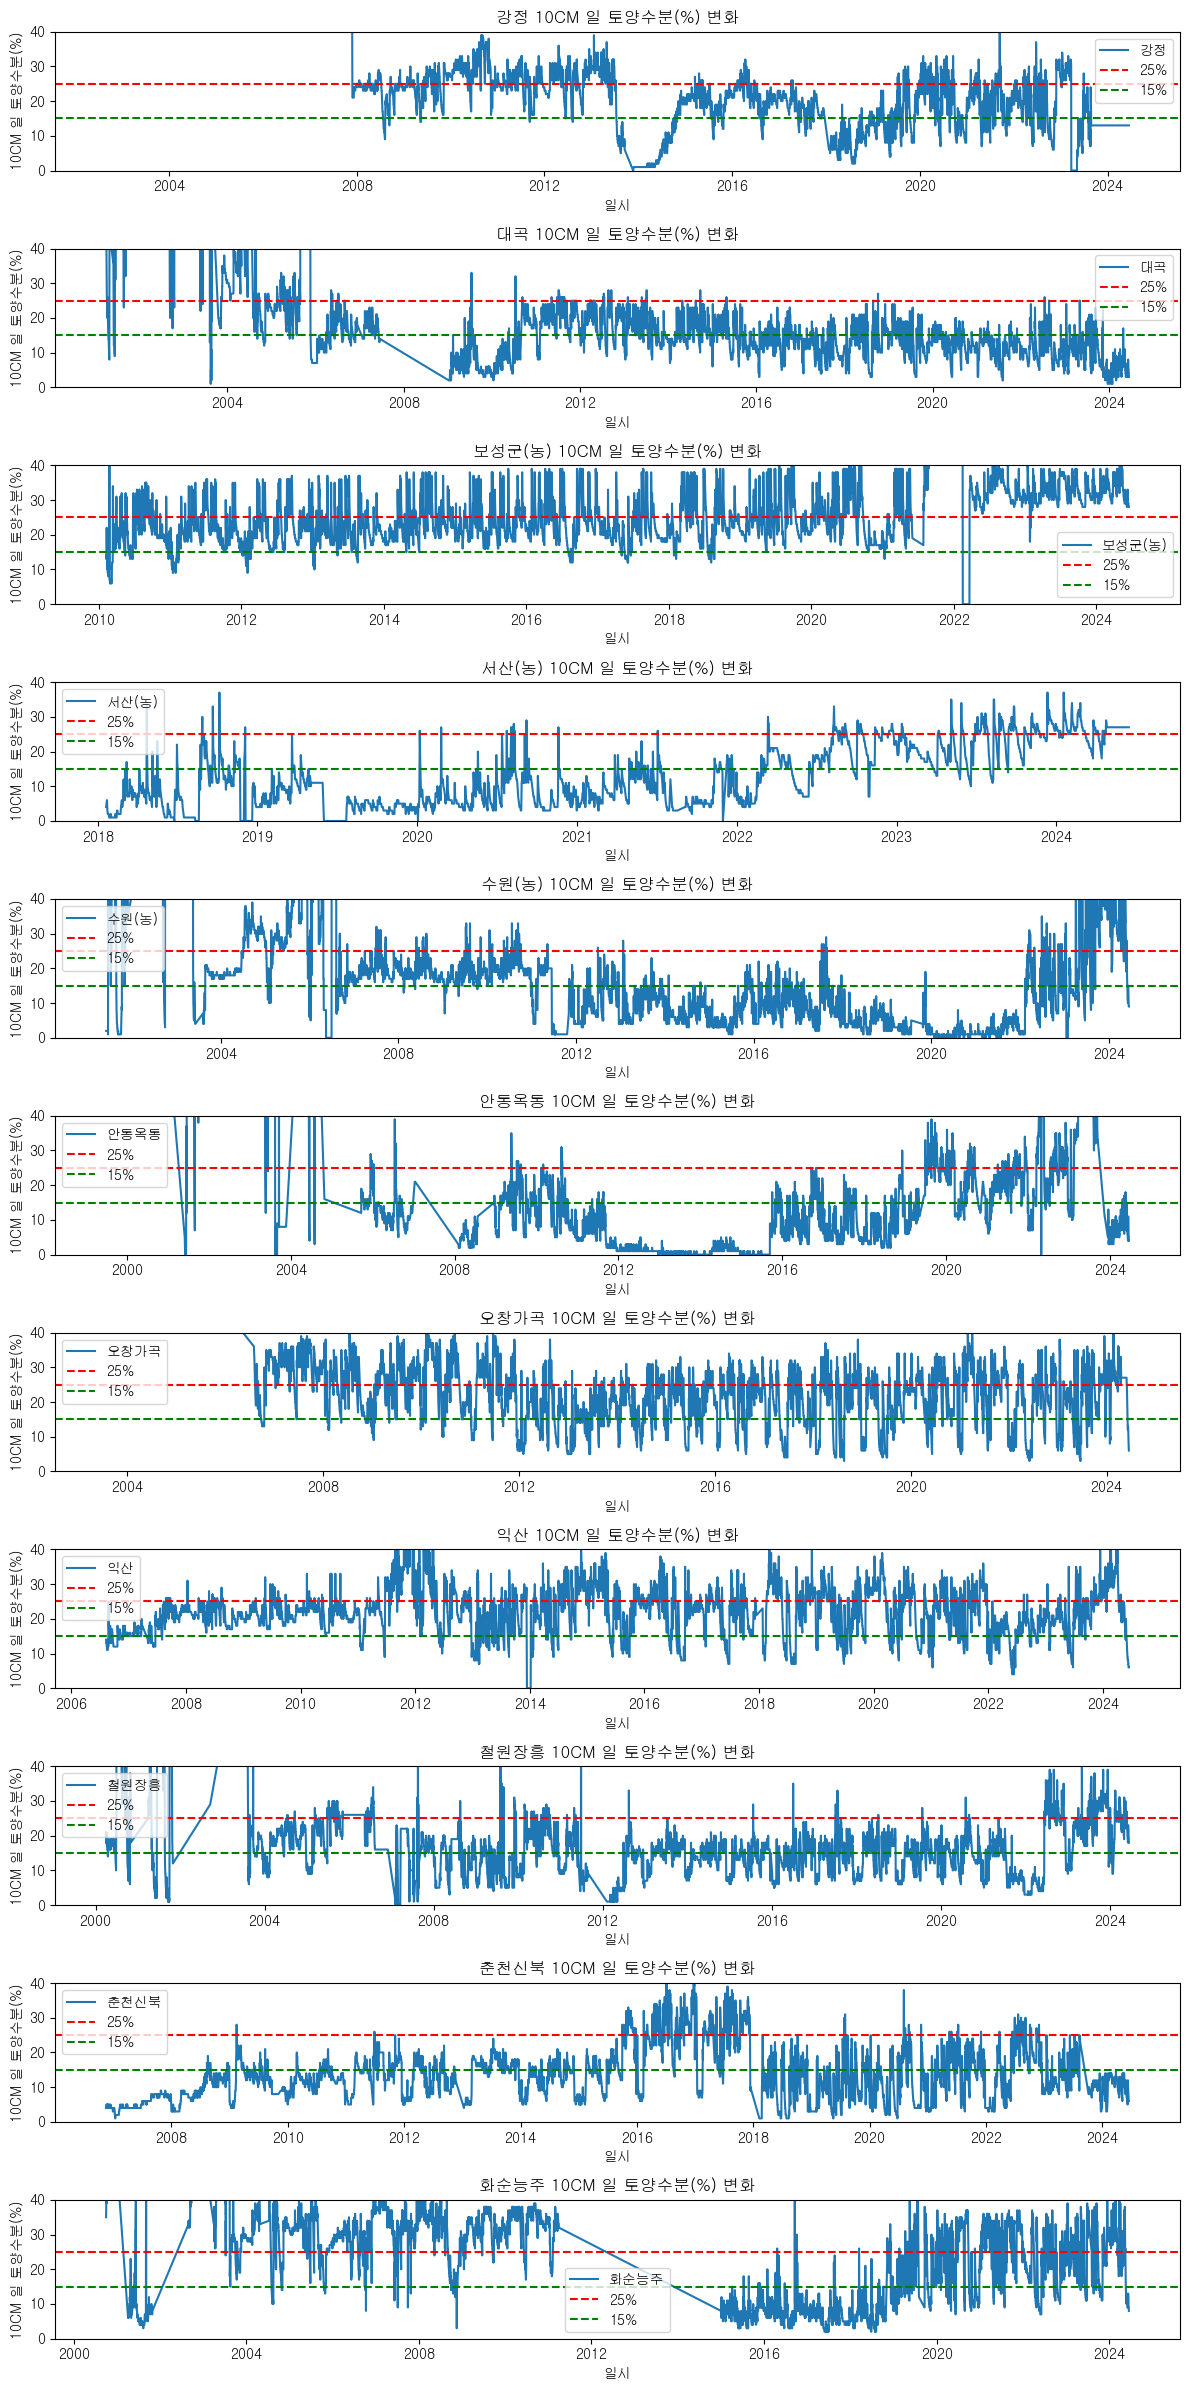

In [212]:
# 그래프 그리기
plt.figure(figsize=(12, 24))

for i, location in enumerate(locations):
    plt.subplot(11, 1, i+1) 
    subset = df[df['지점명'] == location]
    plt.plot(subset['일시'], subset['10CM 일 토양수분(%)'], label=location)

    # 수평선 그리기
    plt.axhline(y=25, color='r', linestyle='--', label='25%')
    plt.axhline(y=15, color='g', linestyle='--', label='15%')
    
    plt.title(f'{location} 10CM 일 토양수분(%) 변화')
    plt.xlabel('일시')
    plt.ylabel('10CM 일 토양수분(%)')
    plt.legend()
    plt.ylim(0,40)

plt.tight_layout()
plt.show()


In [213]:
# 교차점 개수를 저장할 데이터프레임 생성
y_values = np.arange(0, 31, 1)  # 0부터 30까지의 y값 범위

crossings_data = {location: {y: 0 for y in y_values} for location in locations}

# 각 지점별로 교차점 개수 계산
for location in locations:
    subset = df[df['지점명'] == location]
    
    for y in y_values:
        crossing_points = (subset['10CM 일 토양수분(%)'].shift(1) < y) & (subset['10CM 일 토양수분(%)'] >= y)
        num_crossings = crossing_points.sum()
        crossings_data[location][y] = num_crossings
            
    # 최대 교차점 y값 및 교차점 개수 추가
    max_crossings_info = {
        location: max(crossings_data[location].items(), key=lambda item: item[1])
        for location in locations
    }

# 데이터프레임으로 변환
crossings_df = pd.DataFrame(crossings_data)

In [214]:
max_crossings_info

{'강정': (25, 187),
 '대곡': (16, 263),
 '보성군(농)': (25, 257),
 '서산(농)': (6, 84),
 '수원(농)': (19, 207),
 '안동옥동': (11, 166),
 '오창가곡': (27, 304),
 '익산': (24, 304),
 '철원장흥': (18, 289),
 '춘천신북': (16, 229),
 '화순능주': (30, 205)}

In [215]:
crossings_df

,강정,대곡,보성군(농),서산(농),수원(농),안동옥동,오창가곡,익산,철원장흥,춘천신북,화순능주
0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,7,40,57,0,1,4,0,0
2,9,5,1,11,73,62,0,1,20,6,0
3,6,15,1,20,78,64,0,1,20,13,8
4,8,36,1,43,96,63,3,1,24,37,29
5,11,52,1,65,141,83,12,3,32,57,51
6,17,68,1,84,148,89,27,3,49,72,70
7,24,83,5,81,153,120,49,6,82,98,104
8,40,97,2,78,158,146,74,15,115,114,134
9,58,133,3,80,160,150,78,24,135,137,143


## 데이터 정제

1. 10CM 일 평균습도가 25에서 15퍼센트로 감소할 때를 일시를 기준으로 분리 

In [124]:
df = pd.read_csv("data/전체 데이터 수정본.csv", encoding='utf-8-sig')

df['일시'] = pd.to_datetime(df['일시'])

In [125]:
df

,지점,지점명,일시,10CM 일 토양수분(%),평균 기온(°C),평균 지면온도(°C),일 순복사(MJ/m2),위도,경도,평균 습도(%),평균 풍속(m/s)
0,980,강정,2002-08-30,80.0,26.6,25.3,NaN,33.25992,126.48917,8.0,NaN
1,980,강정,2002-08-31,98.0,24.8,24.1,NaN,33.25992,126.48917,8.0,NaN
2,980,강정,2002-09-01,94.0,26.1,26.0,NaN,33.25992,126.48917,8.0,NaN
3,980,강정,2002-09-02,88.0,25.7,26.4,NaN,33.25992,126.48917,NaN,NaN
4,980,강정,2002-09-03,91.0,26.5,27.1,NaN,33.25992,126.48917,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
67530,973,화순능주,2024-06-11,10.0,24.5,27.6,NaN,35.02330,126.94961,76.0,NaN
67531,973,화순능주,2024-06-12,9.0,25.4,30.2,NaN,35.02330,126.94961,74.0,NaN
67532,973,화순능주,2024-06-13,9.0,25.8,29.6,NaN,35.02330,126.94961,71.0,NaN
67533,973,화순능주,2024-06-14,9.0,26.1,31.0,NaN,35.02330,126.94961,76.0,NaN


In [123]:
period = {}

top_value=25
bottom_value=15

for location in locations:
    subset = df[df['지점명'] == location]
    location_periods = []
    
    for i in range(len(subset)):
        # top_value 이상이 계속해서 나오면 계속해서 start_index 갱신
        # top_value 미만으로 내려갈때의 "최후의 top_value이상의 값"을 찾기 
        if subset.iloc[i]['10CM 일 토양수분(%)'] >= top_value:
            start_index = i;
        # 처음으로 bottom_value 이하가 나왔을 때
        # 물을 줘야함  
        elif subset.iloc[i]['10CM 일 토양수분(%)'] <= bottom_value and start_index is not None:
            end_index = i;
            
            result = subset.iloc[start_index:end_index+1].copy()
            
            # 연속된 일수 인지 체크
            if not result.empty:
                start_date = result.iloc[0]['일시']
                end_date = result.iloc[-1]['일시']
                length = len(result)
                # 연속된 일 수 일 때 
                if start_date + pd.Timedelta(days=length-1) == end_date and length <=20:
                    for j in range(length):
                        result.loc[result.index[j], '지난 일 수'] = (result.iloc[j]['일시'] - start_date).days
                        if j == length-1:
                            result.loc[result.index[j], 'Target'] = True
                        else:
                            result.loc[result.index[j], 'Target'] = False

                    location_periods.append(result)
            start_index = None
            
    period[location] = location_periods

KeyError: '지점명'

In [49]:
dfs = []
for location, dfs_location in period.items():
    for d in dfs_location:
        dfs.append(d)

combined_df = pd.concat(dfs, ignore_index=True)

combined_df.to_csv("data/15%-25% 연속 일수 데이터.csv", index=False, encoding='utf-8-sig')

In [272]:
# 최적 "최대 습도", "최소 습도" 확인해보기

top_values= [30,29,28,27,26,25,24,23,22,21,20]
bottom_values= [20,19,18,17,16,15,14,13,12,11,10]

for top_value, bottom_value in zip(top_values, bottom_values):
    period = {}
    for location in locations:
        subset = df[df['지점명'] == location]
        location_periods = []
    
        for i in range(len(subset)):
            # top_value 이상이 계속해서 나오면 계속해서 start_index 갱신
            # top_value 미만으로 내려갈때의 "최후의 top_value이상의 값"을 찾기 
            if subset.iloc[i]['10CM 일 토양수분(%)'] >= top_value:
                start_index = i;
            # 처음으로 bottom_value 이하가 나왔을 때
            # 물을 줘야함  
            elif subset.iloc[i]['10CM 일 토양수분(%)'] <= bottom_value and start_index is not None:
                end_index = i;
            
                result = subset.iloc[start_index:end_index+1]
                location_periods.append(result)
            
                start_index = None
        period[location] = location_periods

    total_rows = 0
    # 각 위치별 DataFrame 리스트를 순회하며 행 개수를 더함
    for location, dfs_location in period.items():
        for d in dfs_location:
            total_rows += len(d)

    print(top_value, bottom_value, "Total number of rows in period:", total_rows)

30 20 Total number of rows in period: 5423
29 19 Total number of rows in period: 5299
28 18 Total number of rows in period: 5686
27 17 Total number of rows in period: 5693
26 16 Total number of rows in period: 5400
25 15 Total number of rows in period: 5249
24 14 Total number of rows in period: 5213
23 13 Total number of rows in period: 5493
22 12 Total number of rows in period: 5237
21 11 Total number of rows in period: 5637
20 10 Total number of rows in period: 5511


In [274]:
## 전체 크기
total_rows = 0

# 각 위치별 DataFrame 리스트를 순회하며 행 개수를 더함
for location, dfs_location in period.items():
    for d in dfs_location:
        total_rows += len(d)

print("Total number of rows in period:", total_rows)

Total number of rows in period: 5249


## 데이터 검토

1. "지난 일 수"의 처리에 대한 시각화 -> 너무 긴 기간인 데이터 삭제


In [157]:
df = pd.read_csv("data/15%-25% 연속 일수 데이터.csv", encoding='utf-8-sig')

df['일시'] = pd.to_datetime(df['일시'])

C:\Users\99bea\AppData\Local\Temp\ipykernel_22820\3777611891.py:15: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
C:\Users\99bea\AppData\Local\Temp\ipykernel_22820\3777611891.py:15: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
C:\Users\99bea\AppData\Local\Temp\ipykernel_22820\3777611891.py:15: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
C:\Users\99bea\AppData\Local\Temp\ipykernel_22820\3777611891.py:15: UserWarning: Glyph 45212 (\N{HANGUL SYLLABLE NAN}) missing from current font.
  plt.tight_layout()
C:\Users\99bea\AppData\Local\Temp\ipykernel_22820\3777611891.py:15: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\99bea\AppData\Local\Temp\ipykernel_22820\3777611891.py:15: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
C

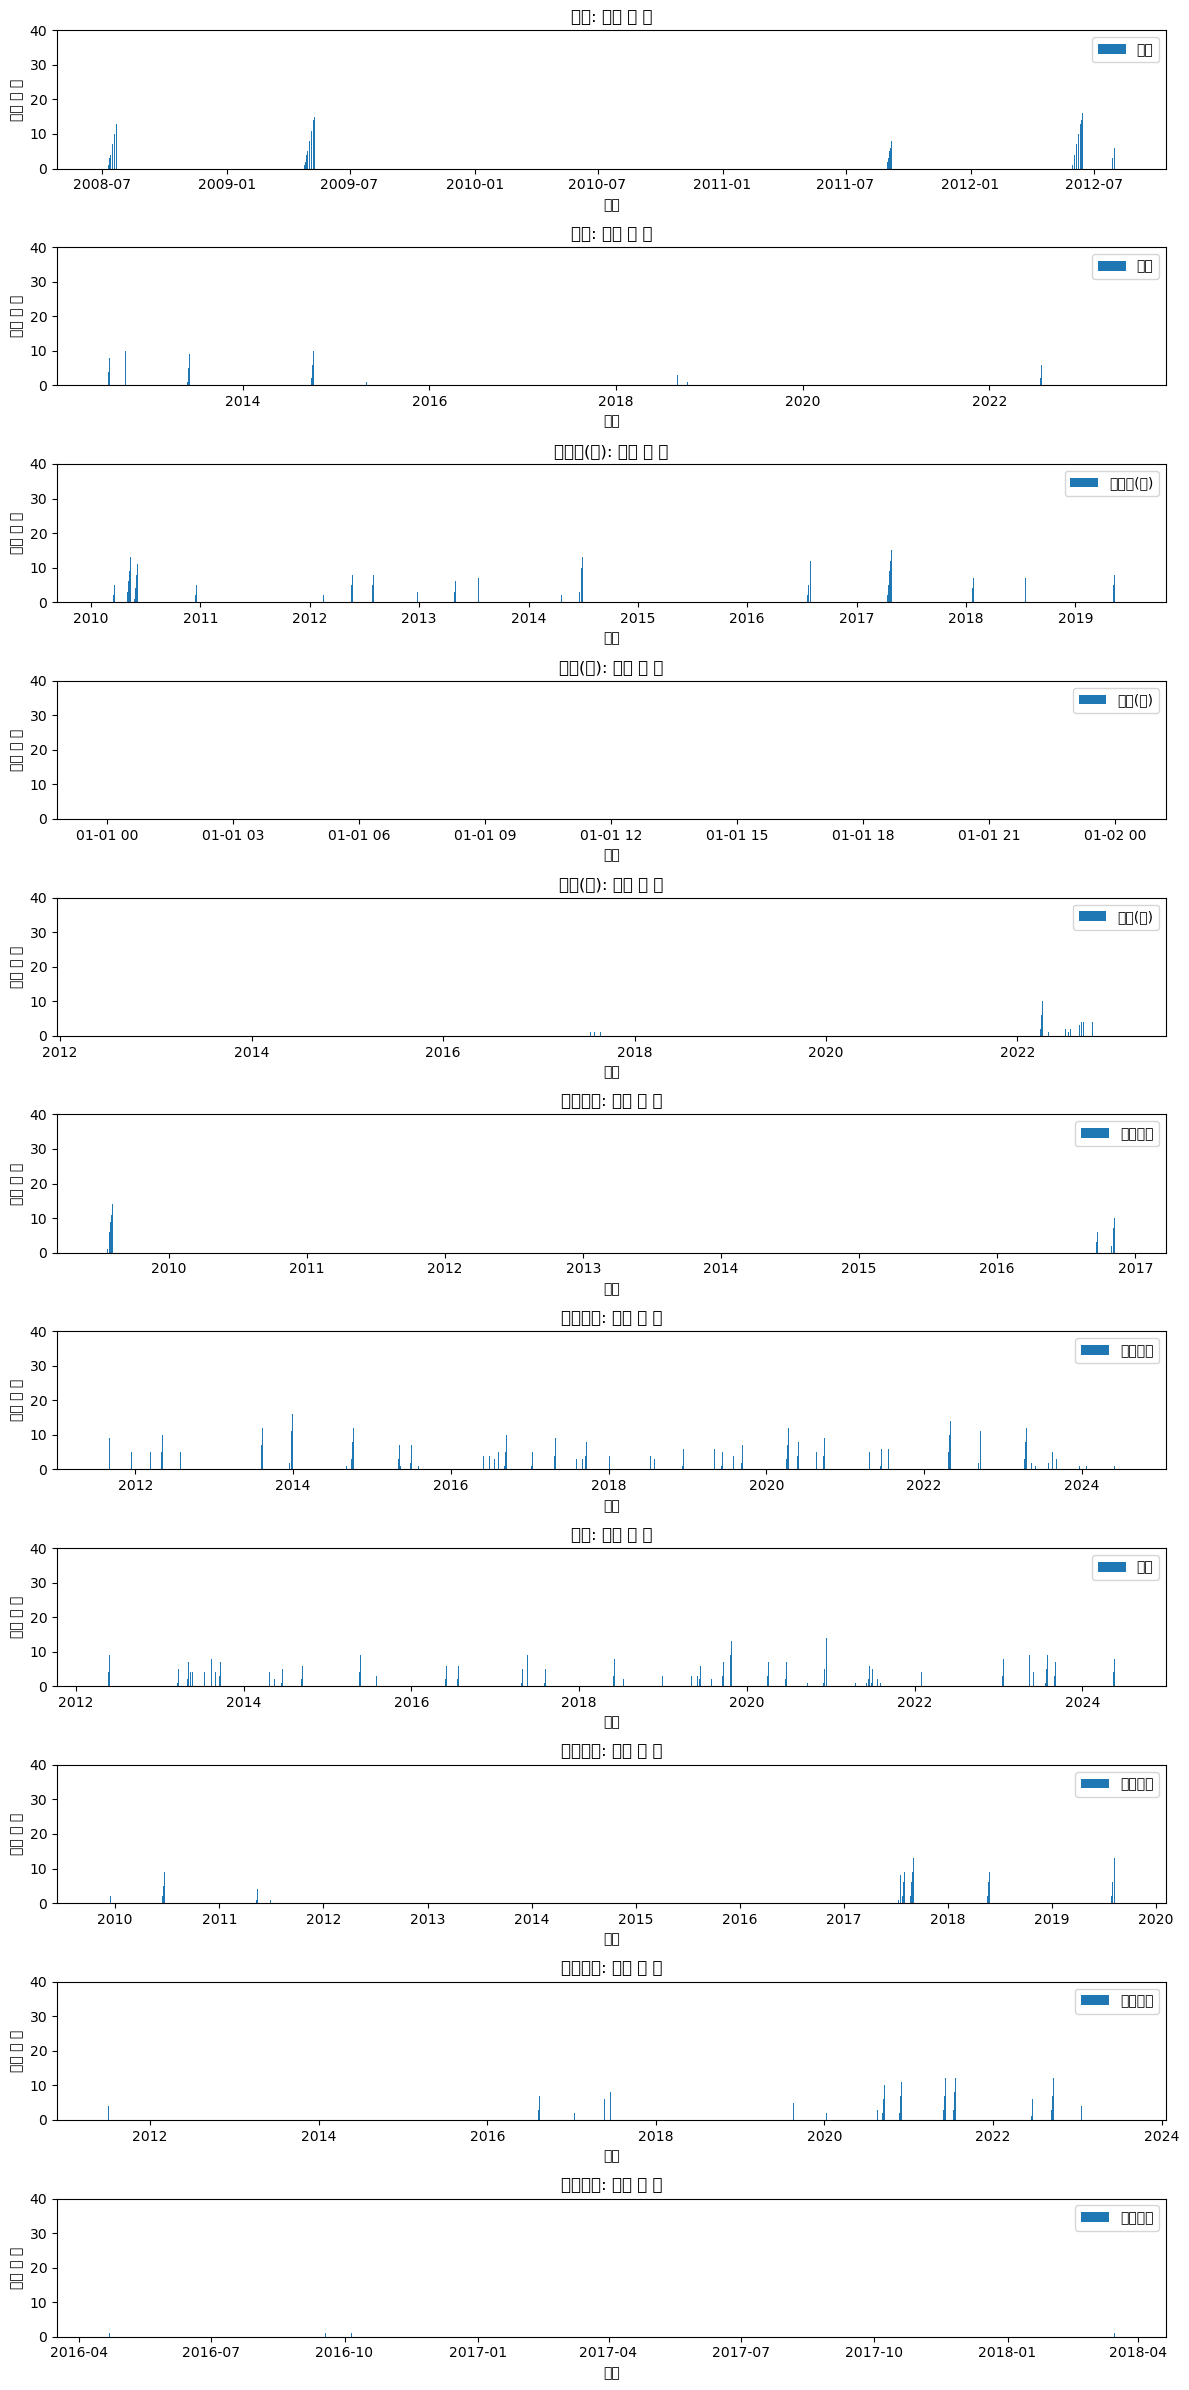

In [158]:
# 그래프 그리기
plt.figure(figsize=(12, 24))

for i, location in enumerate(locations):
    plt.subplot(11, 1, i+1) 
    subset = df[df['지점명'] == location]
    plt.bar(subset['일시'], subset['지난 일 수'], label=location)

    plt.title(f'{location}: 지난 일 수')
    plt.xlabel('일시')
    plt.ylabel('지난 일 수')
    plt.legend()
    plt.ylim(0,40)

plt.tight_layout()
plt.show()

## 머신러닝에 사용할 수 있도록 정제

In [175]:
df = pd.read_csv("data/15%-25% 연속 일수 데이터.csv", encoding='utf-8-sig')

df['일시'] = pd.to_datetime(df['일시'])

In [176]:
df.dropna(subset=['지점'], inplace=True)

In [177]:
df.shape

(1671, 13)

In [178]:
df[df["평균 지면온도(°C)"].isna()].index

Index([], dtype='int64')

In [179]:
df[df["평균 습도(%)"].isna()].index

Index([], dtype='int64')

In [180]:
df.isna().sum()

지점                  0
지점명                 0
일시                  0
10CM 일 토양수분(%)      0
평균 기온(°C)           0
평균 지면온도(°C)         0
일 순복사(MJ/m2)      123
위도                  0
경도                  0
평균 습도(%)            0
평균 풍속(m/s)        126
지난 일 수              0
Target              0
dtype: int64

In [181]:
df["일 순복사(MJ/m2)"] = df["일 순복사(MJ/m2)"].fillna(df["일 순복사(MJ/m2)"].mean())

In [182]:
df["평균 풍속(m/s)"] = df["평균 풍속(m/s)"].fillna(df["평균 풍속(m/s)"].mean())

In [183]:
df.isna().sum()

지점                0
지점명               0
일시                0
10CM 일 토양수분(%)    0
평균 기온(°C)         0
평균 지면온도(°C)       0
일 순복사(MJ/m2)      0
위도                0
경도                0
평균 습도(%)          0
평균 풍속(m/s)        0
지난 일 수            0
Target            0
dtype: int64

In [184]:
df

,지점,지점명,일시,10CM 일 토양수분(%),평균 기온(°C),평균 지면온도(°C),일 순복사(MJ/m2),위도,경도,평균 습도(%),평균 풍속(m/s),지난 일 수,Target
0,980,강정,2008-07-10,25,27.0,31.6,16.35449,33.25992,126.48917,75.333333,0.60,0,False
1,980,강정,2008-07-11,24,27.3,31.0,12.06000,33.25992,126.48917,78.333333,0.80,1,False
2,980,강정,2008-07-12,24,27.2,30.1,8.98000,33.25992,126.48917,86.000000,0.65,2,False
3,980,강정,2008-07-13,23,27.9,31.5,12.75000,33.25992,126.48917,83.000000,1.25,3,False
4,980,강정,2008-07-14,23,28.6,33.6,15.70000,33.25992,126.48917,80.000000,0.65,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,973,화순능주,2016-09-18,11,21.2,24.0,3.79000,35.02330,126.94961,95.666667,0.45,1,True
1667,973,화순능주,2016-10-05,30,20.5,22.5,8.31000,35.02330,126.94961,87.666667,2.20,0,False
1668,973,화순능주,2016-10-06,10,18.1,21.8,12.39000,35.02330,126.94961,80.000000,0.95,1,True
1669,973,화순능주,2018-03-15,26,13.1,11.8,1.15000,35.02330,126.94961,98.666667,1.50,0,False


In [185]:
# '월' 열 생성
df['월'] = df['일시'].dt.month

# '일' 열 생성
df['일'] = df['일시'].dt.day

df = df.drop(columns=['지점', '지점명', '일시', '10CM 일 토양수분(%)'])

In [186]:
df

,평균 기온(°C),평균 지면온도(°C),일 순복사(MJ/m2),위도,경도,평균 습도(%),평균 풍속(m/s),지난 일 수,Target,월,일
0,27.0,31.6,16.35449,33.25992,126.48917,75.333333,0.60,0,False,7,10
1,27.3,31.0,12.06000,33.25992,126.48917,78.333333,0.80,1,False,7,11
2,27.2,30.1,8.98000,33.25992,126.48917,86.000000,0.65,2,False,7,12
3,27.9,31.5,12.75000,33.25992,126.48917,83.000000,1.25,3,False,7,13
4,28.6,33.6,15.70000,33.25992,126.48917,80.000000,0.65,4,False,7,14
...,...,...,...,...,...,...,...,...,...,...,...
1666,21.2,24.0,3.79000,35.02330,126.94961,95.666667,0.45,1,True,9,18
1667,20.5,22.5,8.31000,35.02330,126.94961,87.666667,2.20,0,False,10,5
1668,18.1,21.8,12.39000,35.02330,126.94961,80.000000,0.95,1,True,10,6
1669,13.1,11.8,1.15000,35.02330,126.94961,98.666667,1.50,0,False,3,15


In [187]:
# "누적" 추가
for i in range(len(df)):
    if df.iloc[i]['지난 일 수'] == 0:
        H = df.iloc[i]['평균 습도(%)']
        T = df.iloc[i]['평균 기온(°C)']
        W = df.iloc[i]['평균 풍속(m/s)']
        G = df.iloc[i]['평균 지면온도(°C)']
        R = df.iloc[i]['일 순복사(MJ/m2)']
    else:
        H = H + df.iloc[i]['평균 습도(%)']
        T = T + df.iloc[i]['평균 기온(°C)']
        W = W + df.iloc[i]['평균 풍속(m/s)']
        G = G + df.iloc[i]['평균 지면온도(°C)']
        R = R + df.iloc[i]['일 순복사(MJ/m2)']

    df.loc[df.index[i], '누적 평균 습도(%)'] = H / (df.iloc[i]['지난 일 수'] + 1)
    df.loc[df.index[i], '누적 평균 기온(°C)'] = T / (df.iloc[i]['지난 일 수'] + 1)
    df.loc[df.index[i], '누적 평균 풍속(m/s)'] = W / (df.iloc[i]['지난 일 수'] + 1)
    df.loc[df.index[i], '누적 평균 지면온도(°C)'] = G / (df.iloc[i]['지난 일 수'] + 1)
    df.loc[df.index[i], '누적 평균 일 순복사(MJ/m2)'] = R / (df.iloc[i]['지난 일 수'] + 1)
        

In [188]:
df.head(20)

,평균 기온(°C),평균 지면온도(°C),일 순복사(MJ/m2),위도,경도,평균 습도(%),평균 풍속(m/s),지난 일 수,Target,월,일,누적 평균 습도(%),누적 평균 기온(°C),누적 평균 풍속(m/s),누적 평균 지면온도(°C),누적 평균 일 순복사(MJ/m2)
0,27.0,31.6,16.35449,33.25992,126.48917,75.333333,0.60,0,False,7,10,75.333333,27.000000,0.600000,31.600000,16.354490
1,27.3,31.0,12.06000,33.25992,126.48917,78.333333,0.80,1,False,7,11,76.833333,27.150000,0.700000,31.300000,14.207245
2,27.2,30.1,8.98000,33.25992,126.48917,86.000000,0.65,2,False,7,12,79.888889,27.166667,0.683333,30.900000,12.464830
3,27.9,31.5,12.75000,33.25992,126.48917,83.000000,1.25,3,False,7,13,80.666667,27.350000,0.825000,31.050000,12.536122
4,28.6,33.6,15.70000,33.25992,126.48917,80.000000,0.65,4,False,7,14,80.533333,27.600000,0.790000,31.560000,13.168898
5,28.9,35.6,15.65000,33.25992,126.48917,76.333333,0.90,5,False,7,15,79.833333,27.816667,0.808333,32.233333,13.582415
6,29.0,35.9,16.93000,33.25992,126.48917,72.333333,0.75,6,False,7,16,78.761905,27.985714,0.800000,32.757143,14.060641
7,28.9,36.1,16.84000,33.25992,126.48917,74.333333,1.20,7,False,7,17,78.208333,28.100000,0.850000,33.175000,14.408061
8,29.6,35.4,14.10000,33.25992,126.48917,74.666667,0.85,8,False,7,18,77.814815,28.266667,0.850000,33.422222,14.373832
9,29.1,35.2,10.98000,33.25992,126.48917,82.333333,1.45,9,False,7,19,78.266667,28.350000,0.910000,33.600000,14.034449


In [189]:
df = df.drop(columns=['평균 습도(%)', '평균 기온(°C)', '평균 풍속(m/s)', '평균 지면온도(°C)', '일 순복사(MJ/m2)'])

In [190]:
df

,위도,경도,지난 일 수,Target,월,일,누적 평균 습도(%),누적 평균 기온(°C),누적 평균 풍속(m/s),누적 평균 지면온도(°C),누적 평균 일 순복사(MJ/m2)
0,33.25992,126.48917,0,False,7,10,75.333333,27.000000,0.600000,31.60,16.354490
1,33.25992,126.48917,1,False,7,11,76.833333,27.150000,0.700000,31.30,14.207245
2,33.25992,126.48917,2,False,7,12,79.888889,27.166667,0.683333,30.90,12.464830
3,33.25992,126.48917,3,False,7,13,80.666667,27.350000,0.825000,31.05,12.536122
4,33.25992,126.48917,4,False,7,14,80.533333,27.600000,0.790000,31.56,13.168898
...,...,...,...,...,...,...,...,...,...,...,...
1666,35.02330,126.94961,1,True,9,18,96.833333,21.000000,0.925000,23.10,3.065000
1667,35.02330,126.94961,0,False,10,5,87.666667,20.500000,2.200000,22.50,8.310000
1668,35.02330,126.94961,1,True,10,6,83.833333,19.300000,1.575000,22.15,10.350000
1669,35.02330,126.94961,0,False,3,15,98.666667,13.100000,1.500000,11.80,1.150000


In [191]:
# 정렬 
cols = ['월', '일', '위도', '경도', '누적 평균 습도(%)', '누적 평균 기온(°C)', '누적 평균 풍속(m/s)', '누적 평균 지면온도(°C)', '누적 평균 일 순복사(MJ/m2)', '지난 일 수', 'Target']
df = df[cols]

In [192]:
df

,월,일,위도,경도,누적 평균 습도(%),누적 평균 기온(°C),누적 평균 풍속(m/s),누적 평균 지면온도(°C),누적 평균 일 순복사(MJ/m2),지난 일 수,Target
0,7,10,33.25992,126.48917,75.333333,27.000000,0.600000,31.60,16.354490,0,False
1,7,11,33.25992,126.48917,76.833333,27.150000,0.700000,31.30,14.207245,1,False
2,7,12,33.25992,126.48917,79.888889,27.166667,0.683333,30.90,12.464830,2,False
3,7,13,33.25992,126.48917,80.666667,27.350000,0.825000,31.05,12.536122,3,False
4,7,14,33.25992,126.48917,80.533333,27.600000,0.790000,31.56,13.168898,4,False
...,...,...,...,...,...,...,...,...,...,...,...
1666,9,18,35.02330,126.94961,96.833333,21.000000,0.925000,23.10,3.065000,1,True
1667,10,5,35.02330,126.94961,87.666667,20.500000,2.200000,22.50,8.310000,0,False
1668,10,6,35.02330,126.94961,83.833333,19.300000,1.575000,22.15,10.350000,1,True
1669,3,15,35.02330,126.94961,98.666667,13.100000,1.500000,11.80,1.150000,0,False


In [193]:
df.to_csv("Dosi-NonBu 토양 예측 데이터.csv", index=False, encoding='utf-8-sig')